In [34]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Load mat file

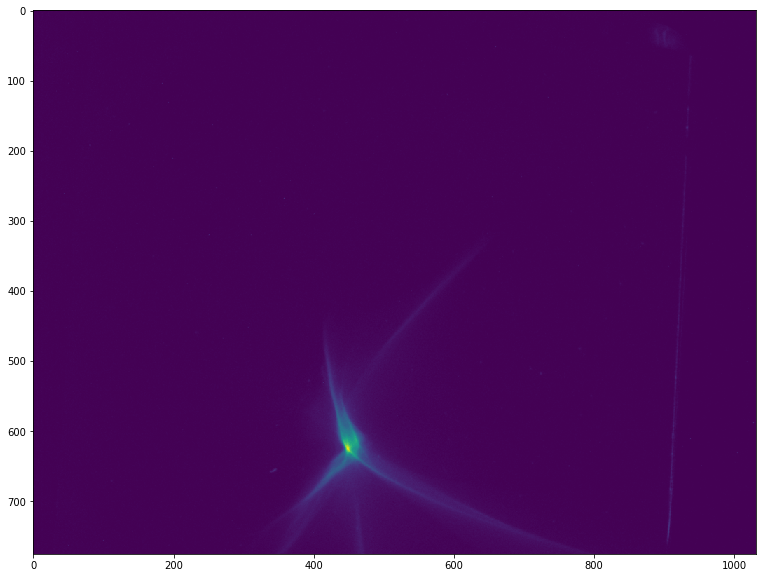

In [51]:
data = loadmat('008.mat')
beam = data['profiledata']
plt.figure(figsize=(20,10))
plt.imshow(beam)

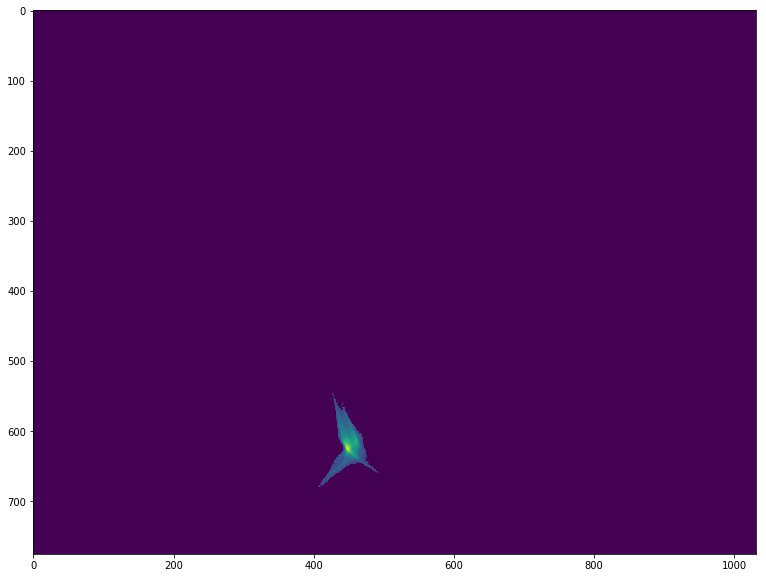

In [52]:
beam = data['profiledata']
clean_beam1 = beam[:]
clean_beam1[clean_beam1<np.max(clean_beam1)*0.3] = 0
plt.figure(figsize=(20,10))
plt.imshow(clean_beam1)

In [53]:
def norm(data):
    maxValue = np.max(data)
    normData = [i/maxValue for i in data]
    return normData

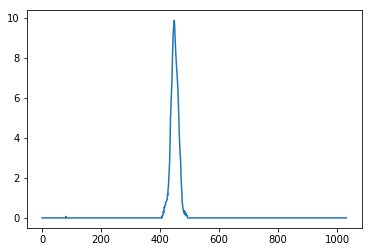

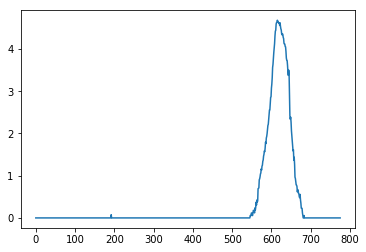

In [54]:
# xprof = norm(beam.sum(axis=0))
# yprof = norm(beam.sum(axis=1))

xprof = beam.sum(axis=0)
yprof = beam.sum(axis=1)

plt.plot(xprof)
plt.show()
plt.plot(yprof)
plt.show()

In [55]:
def getcentroifd(data):
    avg_val = 0
    sum_val = 0
    
    axis_data = np.linspace(0, len(data), num=len(data))
    
    for i in range(len(data)):
        avg_val = avg_val + axis_data[i] * data[i]
        sum_val = sum_val + data[i]
        
    return avg_val/sum_val

def getSigma(data, centroid):
    
    std = 0
    sum_val = 0
    axis_data = np.linspace(0, len(data), num=len(data))
    
    for i in range(len(data)):
        std = std + data[i]*(axis_data[i] - centroid)**2
        sum_val = sum_val + data[i]
    
    return 0.02841 * np.sqrt(std/sum_val)


In [56]:
getcentroifd(xprof)

449.5351265896847

In [57]:
-14.66 + getcentroifd(xprof)*0.02841

-1.8887070535870567

In [58]:
getSigma(xprof, getcentroifd(xprof))

0.39951076387607803